In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()
import io

dj_bus = pd.read_csv(io.StringIO(uploaded['최종데이터_4.csv'].decode('euc-kr')))    # 파일 불러오기
dj_bus.head()

Saving 최종데이터_4.csv to 최종데이터_4.csv


고유번호.ARS.     정류장 시군구명   읍면동명 유개승강장  차로위치                    위치.BIT.  \
0      11830   복합터미널   동구    성남동   장대형  일반차로         용전동 117-18 영천설렁탕 앞   
1      12400     대전역   동구    중앙동   장대형  일반차로       정동 15-1 대한통운빌딩 1동 1호   
2      20050  으능정이거리   중구  은행선화동   표준형  일반차로            은행동 48-21 이안경원앞   
3      32160   둔산경찰서   서구   둔산1동   장대형  일반차로             둔산2동 950 둔산경찰서   
4      32130     이마트   서구   둔산1동   장대형  일반차로  둔산2동 961 이마트 앞/KT대전영업국 건너   

     위도(lat)     경도(lon)   총인구수  ...  20세_64세  대기시간     초승수합    환승수합   총승차객합계  \
0  36.349038  127.437193  11385  ...     7179  7.72  2359408  461546  2820954   
1  36.332538  127.432130   4329  ...     2488  8.16  1661910  670396  2332306   
2  36.329102  127.427445  15315  ...    10971  6.73  1297761  423347  1721108   
3  36.358540  127.379583  16554  ...     9932  6.14   752046  587501  1339547   
4  36.355155  127.379210  16554  ...     9932  6.80   814075  394791  1208866   

   400m_내_지하철역_수  400m_내_학교_수  400m_내_복지시설_수  400m_내_미세먼지인자_수  cluster_km  
0              0            1              0                2           3  
1              1            0              0               17           3  
2              2            1              0                7           3  
3              2            1              0                1           3  
4              2            0              0                1           3  

[5 rows x 24 columns]

In [4]:
x = dj_bus[['총인구수','19세이하','65세이상','대기시간','초승수합','환승수합','총승차객합계',"400m_내_지하철역_수",'400m_내_학교_수','400m_내_복지시설_수','400m_내_미세먼지인자_수']]   #분석에 필요한 데이터만 추출

minmax 정규화

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)
X = pd.DataFrame(x_minmax,columns =['총인구수','19세이하','65세이상','대기시간','초승수합','환승수합','총승차객합계',"400m_내_지하철역_수",'400m_내_학교_수','400m_내_복지시설_수','400m_내_미세먼지인자_수'])

PCA

In [6]:
pca = PCA(random_state=1107)
x_p = pca.fit_transform(X)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.365175
1     0.529667
2     0.676595
3     0.778861
4     0.864144
5     0.934285
6     0.972709
7     0.988852
8     0.996029
9     1.000000
10    1.000000
dtype: float64

In [7]:
pca3 = PCA(n_components=5)
x_pp = pca3.fit_transform(X)

In [8]:
x_ppp = pd.DataFrame(data=x_pp,columns = ['PC1','PC2','PC3','PC4','PC5'])
x_pca = x_ppp.iloc[:,:5]
x_pca

PC1       PC2       PC3       PC4       PC5
0    -0.332991  0.066966  0.219526 -0.123200  0.124942
1    -0.733807  0.157826  0.626945 -0.147244  0.132390
2    -0.371104  0.242776  1.008100 -0.088841  0.350954
3    -0.085193  0.193336  1.124793  0.110691  0.102088
4    -0.078118  0.198032  1.106055  0.049241  0.028524
...        ...       ...       ...       ...       ...
1155  0.110599  0.880308  0.174641  0.366712  0.054056
1156 -0.199193  0.121648 -0.229898  0.081444  0.131050
1157 -0.236664  0.178460 -0.162842 -0.046218 -0.057533
1158 -0.294226  0.181064 -0.196127 -0.030062 -0.119432
1159 -0.030630  0.477441 -0.241947  0.130272 -0.001843

[1160 rows x 5 columns]

DBSCAN 분석

In [9]:
from sklearn.cluster import DBSCAN

db_scan = DBSCAN(eps=0.3 ,min_samples=70).fit(x_pca)   #초기값으로 eps=0.3, 최소 개수는 70개로 지정 후 DBSCAN 분석 수행
x_pca['cluster_db'] = db_scan.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
x['cluster_db'] = db_scan.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


군집별 개수

In [11]:
x.groupby('cluster_db').count()

총인구수  19세이하  65세이상  대기시간  초승수합  환승수합  총승차객합계  400m_내_지하철역_수  \
cluster_db                                                                
-1           319    319    319   319   319   319     319            319   
 0           667    667    667   667   667   667     667            667   
 1           174    174    174   174   174   174     174            174   

            400m_내_학교_수  400m_내_복지시설_수  400m_내_미세먼지인자_수  
cluster_db                                               
-1                  319            319              319  
 0                  667            667              667  
 1                  174            174              174

군집별 변수의 평균

In [12]:
x.groupby('cluster_db').mean()

총인구수        19세이하        65세이상      대기시간           초승수합  \
cluster_db                                                                    
-1          21717.677116  3474.087774  3186.294671  9.562947  176201.413793   
 0          17309.406297  2887.277361  2689.788606  9.566657  122956.611694   
 1          15313.948276  2070.465517  2881.074713  8.963276  125505.666667   

                    환승수합         총승차객합계  400m_내_지하철역_수  400m_내_학교_수  \
cluster_db                                                            
-1          53988.338558  230189.752351       0.482759     1.946708   
 0          23917.601199  146874.212894       0.000000     2.397301   
 1          23595.068966  149100.735632       0.000000     2.224138   

            400m_내_복지시설_수  400m_내_미세먼지인자_수  
cluster_db                                  
-1               0.824451         6.043887  
 0               0.000000         4.685157  
 1               1.000000         5.540230

군집별 변수의 중앙값

In [13]:
x.groupby('cluster_db').median()

총인구수   19세이하   65세이상  대기시간     초승수합     환승수합    총승차객합계  \
cluster_db                                                              
-1          22162.0  3505.0  2928.0  9.19  93722.0  11438.0  109050.0   
 0          15363.0  2312.0  2612.0  8.65  69966.0   4772.0   76079.0   
 1          14318.0  1807.0  2974.0  8.53  84590.0   7499.5   97773.5   

            400m_내_지하철역_수  400m_내_학교_수  400m_내_복지시설_수  400m_내_미세먼지인자_수  
cluster_db                                                              
-1                    0.0          1.0            1.0              3.0  
 0                    0.0          2.0            0.0              2.0  
 1                    0.0          2.0            1.0              3.0

군집별로 시각화 (이 중에 예쁜사진 아무거나 쓰면 될듯)

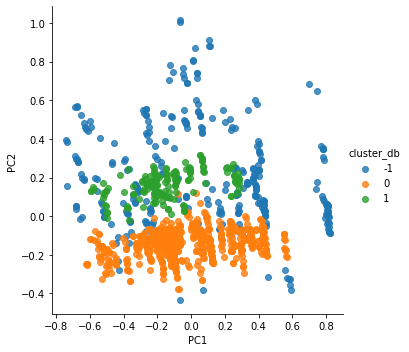

In [14]:
sns.lmplot(x='PC1', y='PC2', data=x_pca, hue='cluster_db', fit_reg=False)

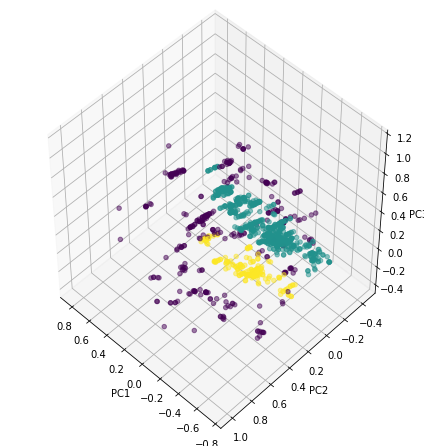

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(x_pca['PC1'],x_pca['PC2'],x_pca['PC3'],c=x_pca['cluster_db'],alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [16]:
import plotly.express as px

fig = px.scatter_3d(
    x_pca, x='PC1', y='PC2', z='PC3',
    color = x_pca.cluster_db
)
fig.show()

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(x_pca, x_pca['cluster_db'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

silhouette_samples( ) return 값의 shape (1160,)


In [18]:
x_pca['silhouette_coeff'] = score_samples

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
average_score = silhouette_score(x_pca, x_pca['cluster_db'])
average_score  # 실루엣계수

0.5339026585261608

In [20]:
X['cluster_db'] = db_scan.labels_
X.head()

총인구수     19세이하     65세이상      대기시간      초승수합      환승수합    총승차객합계  \
0  0.241951  0.206714  0.328634  0.033896  1.000000  0.557551  1.000000   
1  0.052472  0.004714  0.154522  0.037430  0.704367  0.809843  0.826775   
2  0.347485  0.221571  0.334859  0.025944  0.550023  0.511406  0.610105   
3  0.380757  0.652714  0.199378  0.021205  0.318723  0.709705  0.474842   
4  0.380757  0.652714  0.199378  0.026506  0.345014  0.476910  0.428516   

   400m_내_지하철역_수  400m_내_학교_수  400m_내_복지시설_수  400m_내_미세먼지인자_수  cluster_db  
0            0.0     0.090909            0.0         0.024096          -1  
1            0.5     0.000000            0.0         0.204819          -1  
2            1.0     0.090909            0.0         0.084337          -1  
3            1.0     0.090909            0.0         0.012048          -1  
4            1.0     0.000000            0.0         0.012048          -1

In [21]:
idx = X[X['cluster_db']==1].reset_index()['index']
group1 = dj_bus.iloc[idx]
group1['cluster_db'] = "1"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
idx = X[X['cluster_db']==0].reset_index()['index']
group0 = dj_bus.iloc[idx]
group0['cluster_db'] = "0"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
idx = X[X['cluster_db']==-1].reset_index()['index']
group2 = dj_bus.iloc[idx]
group2['cluster_db'] = "-1"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
real_result = pd.concat([group1, group0, group2], axis=0)

In [25]:
real_result

고유번호.ARS.       정류장 시군구명  읍면동명 유개승강장  차로위치  \
543       22250   대전충남병무청   중구  문화1동   장대형  일반차로   
548       31590    코오롱아파트   서구    내동    구형  일반차로   
561       13690  오투그란데아파트   동구   산내동   도시형  일반차로   
575       31570     롯데아파트   서구    내동    구형  일반차로   
588       31610  서우아파트2단지   서구    내동    구형  일반차로   
...         ...       ...  ...   ...   ...   ...   
1146      50170     한남오거리  대덕구   오정동   표준형  일반차로   
1152      20820    대흥동우체국   중구   대흥동   표준형  일반차로   
1154      50560     체육재활원  대덕구   대화동   표준형  일반차로   
1155      31040    둔산초등학교   서구   탄방동    구형  일반차로   
1159      11800   용전동주민센터   동구   용전동    중형  일반차로   

                             위치.BIT.    위도(lat)     경도(lon)   총인구수  ...  \
543   용두동 1-28 시민회관 앞/국제의료기 건너/병무청 앞  36.322648  127.415108  21766  ...   
548                          서구내동214  36.334320  127.371082  23403  ...   
561                       대성동318-4번지  36.287637  127.464708  20193  ...   
575          내동 220-2 롯데아파트상가 롯데쇼핑 앞  36.337680  127.366737  23403  ...   
588               내동174(서우아파트201동건너)  36.333342  127.372600  23403  ...   
...                              ...        ...         ...    ...  ...   
1146       대전광역시 대덕구 오정동 388-4 동아금속앞  36.349655  127.415557  14318  ...   
1152          대흥동 104-2 대전한방병원 버스승강장  36.325347  127.431827  13506  ...   
1154                  대덕구 대화동 산 3-30  36.367813  127.418502   6812  ...   
1155           탄방동 587(둔산남로 50)버스승강장  36.348390  127.383023  26774  ...   
1159       대전광역시 동구 용전동 43-1 옛날전통짜장앞  36.357228  127.433005  20335  ...   

       대기시간    초승수합    환승수합  총승차객합계  400m_내_지하철역_수  400m_내_학교_수  \
543    8.43  442538  134862  577400              0            2   
548    7.35  327902  132939  460841              0            5   
561    8.46  313075   13740  326815              0            1   
575    7.31  253108   10080  263188              0            3   
588    8.60  164187   48475  212662              0            5   
...     ...     ...     ...     ...            ...          ...   
1146  10.32   16997    2418   19415              0            1   
1152  22.11   15206     907   16113              0            0   
1154  10.24    8762    3440   12202              0            0   
1155   8.50   10877     599   11476              1            2   
1159   7.00    7438     720    8158              0            2   

      400m_내_복지시설_수  400m_내_미세먼지인자_수  cluster_km  cluster_db  
543               1                3           1           1  
548               1                4           1           1  
561               1                5           1           1  
575               1                2           1           1  
588               1                3           1           1  
...             ...              ...         ...         ...  
1146              2               47           0          -1  
1152              2               13           0          -1  
1154              2               73           0          -1  
1155              3                2           0          -1  
1159              2                9           0          -1  

[1160 rows x 25 columns]

In [26]:
real_result.to_csv('최종데이터_5.csv',index=False,encoding='cp949')